In [1]:
import pandas as pd
import numpy as np
import re

df = pd.read_excel('XML.xlsx')

# Total Tags

In [12]:
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.head(5)

,RECORDID,XML
1,fc6f79efcb654f7e9287ab92ffa01e07,<SOLUTION><TITLE><![CDATA[UP2720Q monitor vide...
2,9e188d414189476da5edc647cbf142b0,<SOLUTION><TITLE><![CDATA[UP2720Q Troubleshoot...
3,f16787fb14474ab5ab67df8bfbb8983e,<SOLUTION><TITLE><![CDATA[Cannot Toggle KM632 ...
4,381b4d330c79451abae61e7939d12ebc,<SOLUTION><TITLE><![CDATA[Windows 8?? Windows ...
5,26b9e479c85149a8bb1ecd4204a7c856,<SOLUTION><TITLE><![CDATA[DSA-2019-072: Dell k...


In [13]:
def clean(s):
    if ('?????' in str(s)):
        return np.nan
    else:
        return s
    
df_invalid = df[df['XML'].map(clean).isnull()]
df_valid = df[df['XML'].map(clean).notnull()]

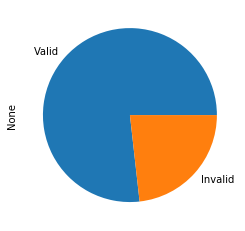

In [26]:
df1 = pd.Series({'Valid':df_valid['XML'].count(),'Invalid':df_invalid['XML'].count()})
df1.plot(kind = 'pie')

In [29]:
df_invalid.count()

RECORDID    27211
XML         27211
dtype: int64

In [30]:
df_valid.count()

RECORDID    89952
XML         89952
dtype: int64

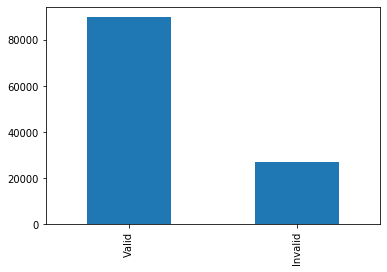

In [28]:
df1.plot(kind = 'bar')

# English Tags

In [2]:
df1 = pd.read_csv('for_logan.csv')

In [3]:
def clean(s):
    if ('?????' in str(s)):
        return np.nan
    else:
        return s
    
df1_invalid = df1[df1['Column2'].map(clean).isnull()]
df1_valid = df1[df1['Column2'].map(clean).notnull()]

In [4]:
df2 = pd.Series({'Valid':df1_valid['Column2'].count(),'Invalid':df1_invalid['Column2'].count()})
df2.plot(kind = 'pie')    

In [5]:
df1_invalid.count()

Unnamed: 0                1202
Unnamed: 0.1              1202
RECORDID                  1202
DOCUMENTID                1202
LOCALEID                  1202
INDEXMASTERIDENTIFIERS    1202
NAME                      1202
Duplicate                 1202
PK                        1202
Tags                      1202
Column1                    396
Column2                    396
Exist                     1202
dtype: int64

In [7]:
df1_valid.count()

Unnamed: 0                78360
Unnamed: 0.1              78360
RECORDID                  78360
DOCUMENTID                78360
LOCALEID                  78360
INDEXMASTERIDENTIFIERS    78360
NAME                      78360
Duplicate                 78360
PK                        78360
Tags                      78360
Column1                   78360
Column2                   78360
Exist                     78360
dtype: int64

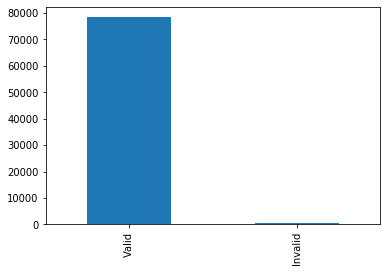

In [8]:
df2.plot(kind = 'bar')

In [9]:
df1

,Unnamed: 0,Unnamed: 0.1,RECORDID,DOCUMENTID,LOCALEID,INDEXMASTERIDENTIFIERS,NAME,Duplicate,PK,Tags,Column1,Column2,Exist
0,0,86,000bcbfa5bb14cf08802224cb98079f7,SLN124546,en_US,How to Access the Alienware Support Area - KB ...,Alienware,0,000bcbfa5bb14cf08802224cb98079f7 SLN124546,Alienware,000bcbfa5bb14cf08802224cb98079f7,<SOLUTION><TITLE><![CDATA[How to Access the Al...,both
1,1,89,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Dell Storage SCv3020,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...",000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,both
2,2,90,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Dell Storage SC8000,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...",000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,both
3,3,91,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Remove Disclaimer - Copy Writer Review,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...",000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,both
4,4,92,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Dell Compellent SC4020,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...",000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79557,79557,695277,ffece9a06f2c42a0b575296aa467e604,SLN145162,en_US,"Adjust the Screen Resolution, Color Depth, Ref...",Inspiron 3655,1,ffece9a06f2c42a0b575296aa467e604 SLN145162,"Latitude 5590, Vostro 3670, Latitude 5491, Opt...",ffece9a06f2c42a0b575296aa467e604,<SOLUTION><TITLE><![CDATA[Adjust the Screen Re...,both
79558,79558,695278,ffece9a06f2c42a0b575296aa467e604,SLN145162,en_US,"Adjust the Screen Resolution, Color Depth, Ref...",Remove Disclaimer - Copy Writer Review,1,ffece9a06f2c42a0b575296aa467e604 SLN145162,"Latitude 5590, Vostro 3670, Latitude 5491, Opt...",ffece9a06f2c42a0b575296aa467e604,<SOLUTION><TITLE><![CDATA[Adjust the Screen Re...,both
79559,79559,695279,ffece9a06f2c42a0b575296aa467e604,SLN145162,en_US,"Adjust the Screen Resolution, Color Depth, Ref...",OptiPlex 7450 All In One,0,ffece9a06f2c42a0b575296aa467e604 SLN145162,"Latitude 5590, Vostro 3670, Latitude 5491, Opt...",ffece9a06f2c42a0b575296aa467e604,<SOLUTION><TITLE><![CDATA[Adjust the Screen Re...,both
79560,79560,695280,ffed6779099d4688963a5fb2c6ee6bae,SLN310666,en_US,PowerEdge R920,Remove Disclaimer - Copy Writer Review,1,ffed6779099d4688963a5fb2c6ee6bae SLN310666,"Remove Disclaimer - Copy Writer Review, TechCe...",ffed6779099d4688963a5fb2c6ee6bae,<SOLUTION><TITLE><![CDATA[PowerEdge R920]]></T...,both


In [10]:
#Remove punctuation and convert to lower case
import string
import nltk

df1['Body'] = df1['INDEXMASTERIDENTIFIERS'].astype(str)
df1['Body'] = df1['Body'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation)))
df1['Body'] = df1['Body'].apply(lambda x :x.lower())

In [11]:
df1['Body']

0        how to access the alienware support area  kb a...
1        storage center upgrade health checker   enforc...
2        storage center upgrade health checker   enforc...
3        storage center upgrade health checker   enforc...
4        storage center upgrade health checker   enforc...
                               ...                        
79557    adjust the screen resolution color depth refre...
79558    adjust the screen resolution color depth refre...
79559    adjust the screen resolution color depth refre...
79560                                     poweredge r920  
79561                                     poweredge r920  
Name: Body, Length: 79562, dtype: object

In [12]:
#Tokenize and remove stop words
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
df1['Body'] = df1['Body'].apply(word_tokenize).apply(set).apply(list)

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 
    
df1['Body'] = df1['Body'].apply(remove_stopwords)

In [13]:
df1['Body']

0        [support, alienware, kb, 347900, area, article...
1        [enforce, upgrade, sparing, enabled, must, cap...
2        [enforce, upgrade, sparing, enabled, must, cap...
3        [enforce, upgrade, sparing, enabled, must, cap...
4        [enforce, upgrade, sparing, enabled, must, cap...
                               ...                        
79557    [fonts, depth, icons, adjust, refresh, windows...
79558    [fonts, depth, icons, adjust, refresh, windows...
79559    [fonts, depth, icons, adjust, refresh, windows...
79560                                    [poweredge, r920]
79561                                    [poweredge, r920]
Name: Body, Length: 79562, dtype: object

In [14]:
#Creating a combined list of all words
all_words = []
for i in range(len(df1)):
    all_words += df1['Body'][i]
from nltk import FreqDist
word_freq = nltk.FreqDist(all_words)

In [16]:
word_freq.most_common()

[('dell', 33084),
 ('windows', 13644),
 ('guide', 7691),
 ('latitude', 6810),
 ('system', 6511),
 ('laser', 5650),
 ('driver', 5406),
 ('poweredge', 4667),
 ('10', 4641),
 ('printer', 4480),
 ('error', 4349),
 ('troubleshoot', 4260),
 ('server', 4183),
 ('issues', 3938),
 ('using', 3809),
 ('precision', 3661),
 ('printers', 3398),
 ('systems', 3343),
 ('optiplex', 3206),
 ('update', 3147),
 ('support', 3123),
 ('troubleshooting', 3086),
 ('7', 3084),
 ('storage', 3010),
 ('install', 2916),
 ('drive', 2571),
 ('pc', 2485),
 ('may', 2388),
 ('installation', 2352),
 ('use', 2316),
 ('networking', 2236),
 ('bios', 2195),
 ('8', 2132),
 ('controller', 2108),
 ('emc', 2069),
 ('microsoft', 2047),
 ('center', 2039),
 ('computer', 2035),
 ('intel', 1996),
 ('boot', 1901),
 ('inspiron', 1891),
 ('power', 1868),
 ('network', 1792),
 ('alienware', 1749),
 ('usb', 1746),
 ('xps', 1699),
 ('screen', 1693),
 ('customer', 1692),
 ('servers', 1668),
 ('series', 1652),
 ('configure', 1618),
 ('data', 1

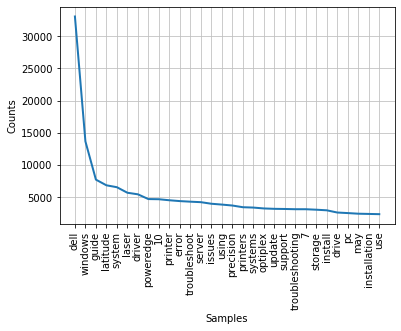

In [17]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
word_freq.plot(30,cumulative=False)
plt.show()

In [21]:
#POS Tagging
nltk.pos_tag(all_words)

[('support', 'NN'),
 ('alienware', 'NN'),
 ('kb', 'VBZ'),
 ('347900', 'CD'),
 ('area', 'NN'),
 ('article', 'NN'),
 ('access', 'NN'),
 ('enforce', 'NN'),
 ('upgrade', 'VBD'),
 ('sparing', 'VBG'),
 ('enabled', 'VBN'),
 ('must', 'MD'),
 ('capacity', 'NN'),
 ('health', 'NN'),
 ('storage', 'NN'),
 ('center', 'NN'),
 ('checker', 'NN'),
 ('enforce', 'NN'),
 ('upgrade', 'VBD'),
 ('sparing', 'VBG'),
 ('enabled', 'VBN'),
 ('must', 'MD'),
 ('capacity', 'NN'),
 ('health', 'NN'),
 ('storage', 'NN'),
 ('center', 'NN'),
 ('checker', 'NN'),
 ('enforce', 'NN'),
 ('upgrade', 'VBD'),
 ('sparing', 'VBG'),
 ('enabled', 'VBN'),
 ('must', 'MD'),
 ('capacity', 'NN'),
 ('health', 'NN'),
 ('storage', 'NN'),
 ('center', 'NN'),
 ('checker', 'NN'),
 ('enforce', 'NN'),
 ('upgrade', 'VBD'),
 ('sparing', 'VBG'),
 ('enabled', 'VBN'),
 ('must', 'MD'),
 ('capacity', 'NN'),
 ('health', 'NN'),
 ('storage', 'NN'),
 ('center', 'NN'),
 ('checker', 'NN'),
 ('enforce', 'NN'),
 ('upgrade', 'VBD'),
 ('sparing', 'VBG'),
 ('enable

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(all_words)

In [23]:
text_tf989989884R5F4R5

<617279x11300 sparse matrix of type '<class 'numpy.float64'>'
	with 608734 stored elements in Compressed Sparse Row format>